# Feature Scaling
----
* 특징 값의 범위를 균일하게 맞춰주는 작업.


|특징|최소|최대|표준편차|   |
|------|:---|:---|:------|:----------|
|집 층수|1|3.5|0.53989|좁은 범위|
|거주면적|290|13540|918|**범위가 너무 넓다**|
|화장실 수|0|8|0.770163|좁은 범위|

----
특징의 범위가 크게 다르면 모델은 각 특징의 중요성을 오인하기 마련.

==> 특징의 데이터 폭이 너무 좁거나 너무 넓은 데이터를 적당한 범위로 조정.

![스케일링](./scaling.png)

In [1]:
import pandas as pd

df = pd.read_csv("../../COALA_DS_DATA/COALA_DS_DATA/week5/data/house.csv")

house_data = df.drop(['id', 'date'], axis = 1)
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis = 1)
target_data = house_data['price']

# train : test set -> 8 : 2
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

# 다시 train set을 8: 2로 나눠 val_data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

print("모든 데이터", train_data.shape) # (행, 열)
print("Train set", x_train.shape, y_train.shape)
print("Valid set", x_valid.shape, y_valid.shape)
print("Test set", x_test.shape,  y_test.shape)

모든 데이터 (21613, 18)
Train set (13832, 18) (13832,)
Valid set (3458, 18) (3458,)
Test set (4323, 18) (4323,)


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler() # StandardScaler는 정규분포에 속성을 이용한 방식

xs_train = scaler.fit_transform(x_train)
xs_train = pd.DataFrame(xs_train, columns = x_train.columns)

ys_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
ys_train = pd.DataFrame(ys_train, columns = ['price'])

xs_valid = scaler.fit_transform(x_valid)
xs_valid = pd.DataFrame(xs_valid, columns = x_valid.columns)

ys_valid = scaler.fit_transform(y_valid.values.reshape(-1, 1))
ys_valid = pd.DataFrame(ys_valid, columns = ['price'])

xs_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.676025,0.831293,1.832477,0.235212,0.938703,-0.090757,2.314708,0.908343,0.286587,0.905773,2.118196,-0.239731,-0.209575,-0.046061,0.165217,0.957901,0.940262,-0.048705
1,1.744318,-0.146826,0.115738,-0.171838,-0.918296,-0.090757,-0.303844,-0.629315,-0.558451,-0.484340,1.162294,-0.342178,-0.209575,0.572168,-0.077128,-0.608766,0.026883,-0.162453
2,0.676025,0.505253,0.898049,-0.222556,0.938703,-0.090757,-0.303844,-0.629315,0.286587,1.337187,-0.658472,0.955492,-0.209575,-0.233403,-0.155025,2.439112,0.809779,-0.236214
3,-0.392269,0.179213,-0.231956,-0.147313,-0.918296,-0.090757,-0.303844,-0.629315,-0.558451,-0.532275,0.525026,0.135911,-0.209575,-0.814163,1.049487,0.074871,0.345841,-0.117361
4,-0.392269,-0.146826,-0.710036,-0.026163,-0.918296,-0.090757,-0.303844,-0.629315,-0.558451,-0.436405,-0.658472,-0.615372,-0.209575,-0.832898,1.020637,0.096234,-0.669024,-0.049669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,-0.392269,0.831293,-0.079840,-0.101038,-0.918296,-0.090757,-0.303844,-0.629315,0.286587,-0.520291,0.820900,0.272507,-0.209575,-0.926569,1.538505,-0.288311,0.302347,-0.079481
13828,0.676025,0.505253,0.419970,-0.229823,0.938703,-0.090757,-0.303844,-0.629315,0.286587,0.809903,-0.658472,1.433581,-0.209575,-0.926569,1.507490,-0.167251,0.693794,-0.287982
13829,-1.460562,-1.450986,-1.481482,-0.259134,-0.918296,-0.090757,-0.303844,2.446001,-2.248529,-1.287250,-0.658472,-0.991014,-0.209575,-0.402011,-0.457956,0.188810,-1.669390,-0.289410
13830,-1.460562,-1.450986,-1.383693,-0.225011,-0.918296,-0.090757,-0.303844,-0.629315,-0.558451,-1.179396,-0.658472,-0.717820,-0.209575,1.040523,1.221869,-0.907856,-1.321437,-0.202297


### Linear Regression with Feature Scaling

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(xs_train, ys_train)

print("train set score :", lr.score(xs_train, ys_train))
print("valid set score :", lr.score(xs_valid, ys_valid))

train set score : 0.6990949171611227
valid set score : 0.700693915781025


### Polynomial Regression with Feature Scaling

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                    LinearRegression()).fit(xs_train, ys_train)
print("train set score :", model.score(xs_train, ys_train))
print("valid set score :", model.score(xs_valid, ys_valid))

train set score : 0.8327721755693727
valid set score : -2.2701927761104022e+17


In [7]:
model2 = make_pipeline(PolynomialFeatures(3),
                    LinearRegression()).fit(xs_train, ys_train)

print("train set score :", model2.score(xs_train, ys_train))
print("valid set score :", model2.score(xs_valid, ys_valid))

train set score : 0.9091935065765712
valid set score : -22734579099506.96


### Ridge - PolynomialFeatures
---
* decision tree의 복잡도를 낮춰 overfitting 문제를 해결하는데 자주 사용

In [8]:
from sklearn.linear_model import Ridge

model3 = make_pipeline(PolynomialFeatures(2),
                      Ridge(alpha=0.1)).fit(xs_train, ys_train)

print("train set score :", model3.score(xs_train, ys_train))
print("valid set score :", model3.score(xs_valid, ys_valid))

train set score : 0.8327667716442414
valid set score : 0.810078199789433


In [9]:
from sklearn.linear_model import Ridge

model3 = make_pipeline(PolynomialFeatures(3),
                      Ridge(alpha=0.1)).fit(xs_train, ys_train)

print("train set score :", model3.score(xs_train, ys_train))
print("valid set score :", model3.score(xs_valid, ys_valid))

train set score : 0.9091409968012888
valid set score : 0.37970667599943136


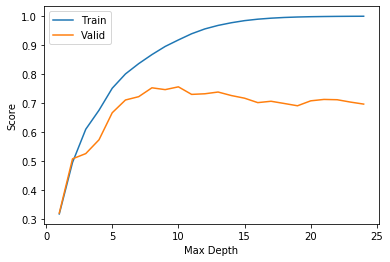

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

train_score = []
valid_score = []
depth_range = range(1, 25)
for dept in depth_range:
    tree = DecisionTreeRegressor(max_depth = dept).fit(xs_train, ys_train)
    
    train_score.append(tree.score(xs_train, ys_train))
    valid_score.append(tree.score(xs_valid, ys_valid))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()